# Part 1 of Take Home Challenge 1
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­ minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_json("logins.json")

In [5]:
df.head()

login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21

In [6]:
df.describe()

/home/dn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


login_time
count                 93142
unique                92265
top     1970-02-12 11:16:53
freq                      3
first   1970-01-01 20:12:16
last    1970-04-13 18:57:38

Our dates in consideration are from 1970-01-01 --> 1970-04-13 
3 Months & 13 days

In [8]:
df.isna().sum()

login_time    0
login_agg     0
dtype: int64

In [7]:
df['login_agg'] = 1

In [9]:
df.set_index('login_time', inplace=True)

In [31]:
df_15interv = df.resample('15T').sum()

In [47]:
df_15interv.reset_index(inplace=True)

In [66]:
df_15interv['day'] = df_15interv['login_time'].dt.dayofweek
df_15interv['linearday'] = df_15interv['login_time'].dt.day
df_15interv['hour'] = df_15interv['login_time'].dt.hour
df_15interv['week'] = df_15interv['login_time'].dt.week

/home/dn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [67]:
df_15interv.head()

login_time  login_agg  day  linearday  hour  week
0 1970-01-01 20:00:00          2    3          1    20     1
1 1970-01-01 20:15:00          6    3          1    20     1
2 1970-01-01 20:30:00          9    3          1    20     1
3 1970-01-01 20:45:00          7    3          1    20     1
4 1970-01-01 21:00:00          1    3          1    21     1

# Login Aggregations Over Time

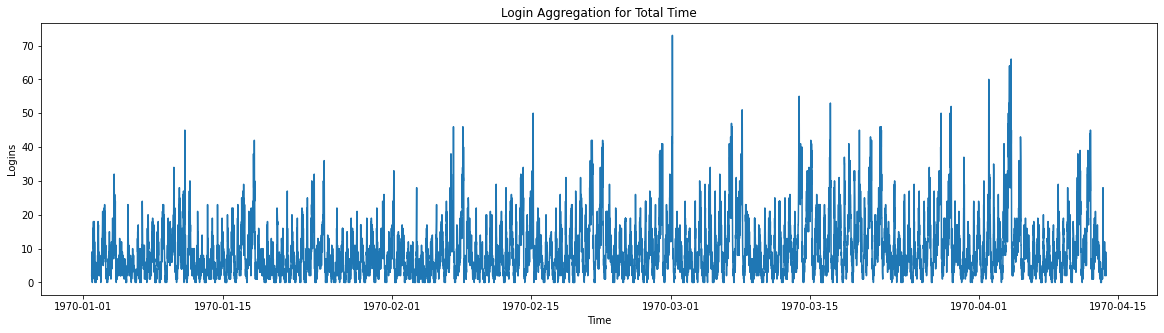

In [51]:
plt.figure(figsize=(20, 5))
plt.plot(df_15interv['login_time'], df_15interv['login_agg'])
plt.title('Login Aggregation for Total Time')
plt.xlabel("Time")
plt.ylabel("Logins")
plt.show()

# Login Aggregation by Date Time Elements

In [68]:
df_day_groups = df_15interv.groupby('day').sum()
df_linday_groups = df_15interv.groupby('linearday').sum()
df_week_groups = df_15interv.groupby('week').sum()
df_hour_groups = df_15interv.groupby('hour').sum()

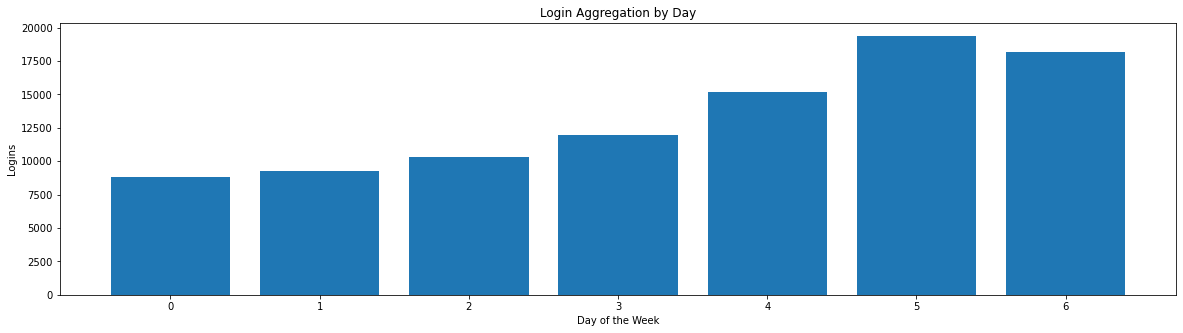

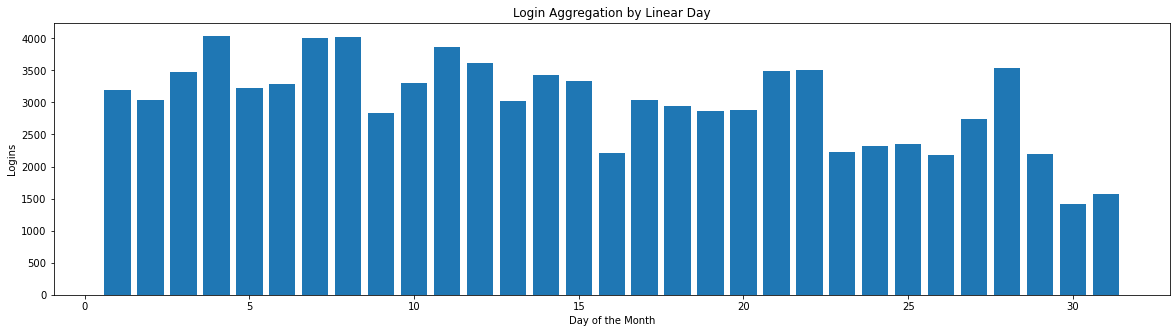

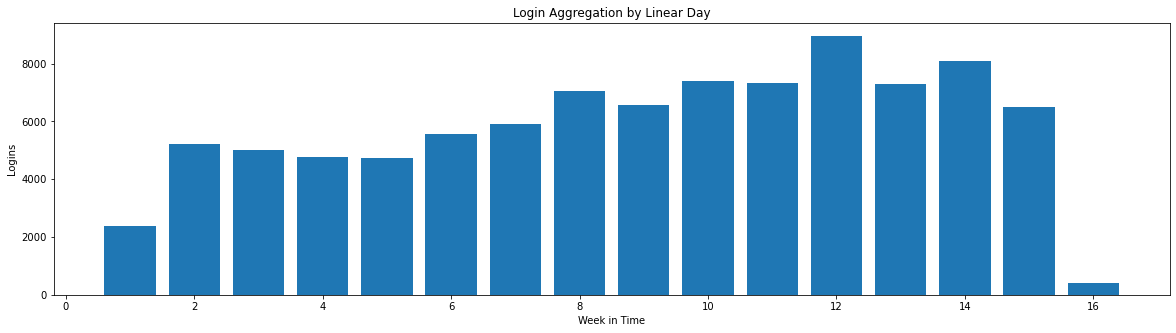

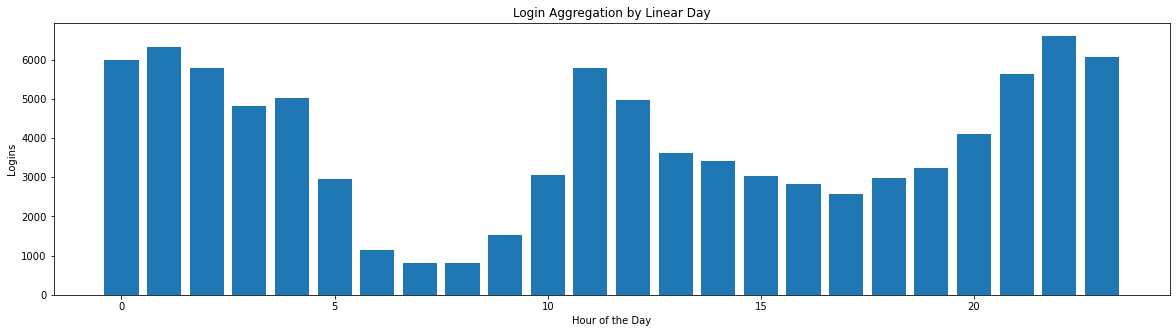

In [75]:
plt.figure(figsize=(20, 5))
plt.bar(df_day_groups.index, df_day_groups['login_agg'])
plt.title('Login Aggregation by Day')
plt.xlabel("Day of the Week")
plt.ylabel("Logins")
plt.show()

plt.figure(figsize=(20, 5))
plt.bar(df_linday_groups.index, df_linday_groups['login_agg'])
plt.title('Login Aggregation by Linear Day')
plt.xlabel("Day of the Month")
plt.ylabel("Logins")
plt.show()

plt.figure(figsize=(20, 5))
plt.bar(df_week_groups.index, df_week_groups['login_agg'])
plt.title('Login Aggregation by Linear Day')
plt.xlabel("Week in Time")
plt.ylabel("Logins")
plt.show()

plt.figure(figsize=(20, 5))
plt.bar(df_hour_groups.index, df_hour_groups['login_agg'])
plt.title('Login Aggregation by Linear Day')
plt.xlabel("Hour of the Day")
plt.ylabel("Logins")
plt.show()

In [5]:
df1 = pd.read_json("ultimate_data_challenge.json")

In [6]:
df1

city  trips_in_first_30_days signup_date  \
0      King's Landing                       4  2014-01-25   
1             Astapor                       0  2014-01-29   
2             Astapor                       3  2014-01-06   
3      King's Landing                       9  2014-01-10   
4          Winterfell                      14  2014-01-27   
...               ...                     ...         ...   
49995  King's Landing                       0  2014-01-25   
49996         Astapor                       1  2014-01-24   
49997      Winterfell                       0  2014-01-31   
49998         Astapor                       2  2014-01-14   
49999         Astapor                       0  2014-01-18   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
0                       4.7       1.10     2014-06-17   iPhone       15.4   
1                       5.0       1.00     2014-05-05  Android        0.0   
2                       4.3       1.00     2014-01-07   iPhone        0.0   
3                       4.6       1.14     2014-06-29   iPhone       20.0   
4                       4.4       1.19     2014-03-15  Android       11.8   
...                     ...        ...            ...      ...        ...   
49995                   5.0       1.00     2014-06-05   iPhone        0.0   
49996                   NaN       1.00     2014-01-25   iPhone        0.0   
49997                   5.0       1.00     2014-05-22  Android        0.0   
49998                   3.0       1.00     2014-01-15   iPhone        0.0   
49999                   NaN       1.00     2014-04-20  Android        0.0   

       ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  
0                     True         46.2      3.67                   5.0  
1                    False         50.0      8.26                   5.0  
2                    False        100.0      0.77                   5.0  
3                     True         80.0      2.36                   4.9  
4                    False         82.4      3.13                   4.9  
...                    ...          ...       ...                   ...  
49995                False        100.0      5.63                   4.2  
49996                False          0.0      0.00                   4.0  
49997                 True        100.0      3.86                   5.0  
49998                False        100.0      4.58                   3.5  
49999                False          0.0      3.49                   5.0  

[50000 rows x 12 columns]

In [9]:
df1.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)